In [112]:
from typing import Text, List
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pathlib

from options_freedom.symbol.vix import vix

In [113]:
def files_in_path(path: Text) -> List[Text]:
    path = pathlib.Path.cwd().joinpath(path)
    return [f for f in listdir(path) if isfile(join(path, f)) and f[-3:] == "gth"]

# open methods
dir_path = os.getcwd()
def gen_results_path(filename: str):
    return os.path.join(dir_path, "", filename)

In [114]:
files = files_in_path("")
files

['BullPutSpread_30_15_45_25_200_75_ligth',
 'BullPutSpread_30_15_45_20_200_50_ligth',
 'BullPutSpread_30_15_45_25_200_50_ligth',
 'BullPutSpread_30_15_45_20_200_25_ligth',
 'BullPutSpread_30_15_45_15_100_50_ligth',
 'BullPutSpread_30_15_45_25_100_25_ligth',
 'BullPutSpread_30_15_45_15_200_75_ligth',
 'BullPutSpread_30_15_45_20_200_75_ligth',
 'BullPutSpread_30_15_45_25_100_75_ligth',
 'BullPutSpread_30_15_45_15_100_25_ligth',
 'BullPutSpread_30_15_45_25_200_25_ligth',
 'BullPutSpread_30_15_45_20_100_50_ligth',
 'BullPutSpread_30_15_45_20_100_75_ligth',
 'BullPutSpread_30_15_45_20_100_25_ligth',
 'BullPutSpread_30_15_45_15_200_25_ligth',
 'BullPutSpread_30_15_45_25_100_50_ligth',
 'BullPutSpread_30_15_45_15_100_75_ligth',
 'BullPutSpread_30_15_45_15_200_50_ligth']

In [115]:
files[1][23:25]

'20'

### Filter under certain VIX

In [116]:
VIX = "20"

In [117]:
files = [f for f in files if f[23:25] == VIX]
len(files)

6

In [118]:
data_set = {}
for file in files:
    with open(gen_results_path(file), "rb") as f:
        trades = pickle.load(f)
        data_set[file] = trades

### Plotting

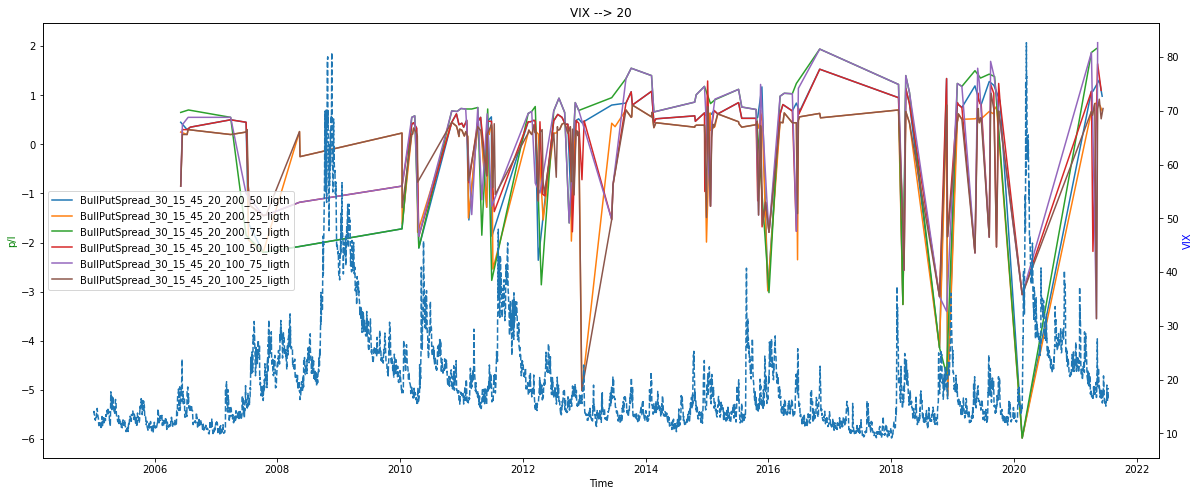

In [119]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
for strategy, d_s in data_set.items():
    dates = list(d_s.keys())
    profits = [t['profit_loss'] for t in d_s.values()]
    ax1.plot(dates, profits, label=strategy)
ax2.plot(vix._df['time_stamp'], vix._df['bid'], '--')

ax1.legend(loc='center left')
ax1.set_xlabel('Time')
ax1.set_ylabel('p/l', color='g')
ax2.set_ylabel('VIX', color='b')

plt.title(f"VIX --> {VIX}")
plt.show()

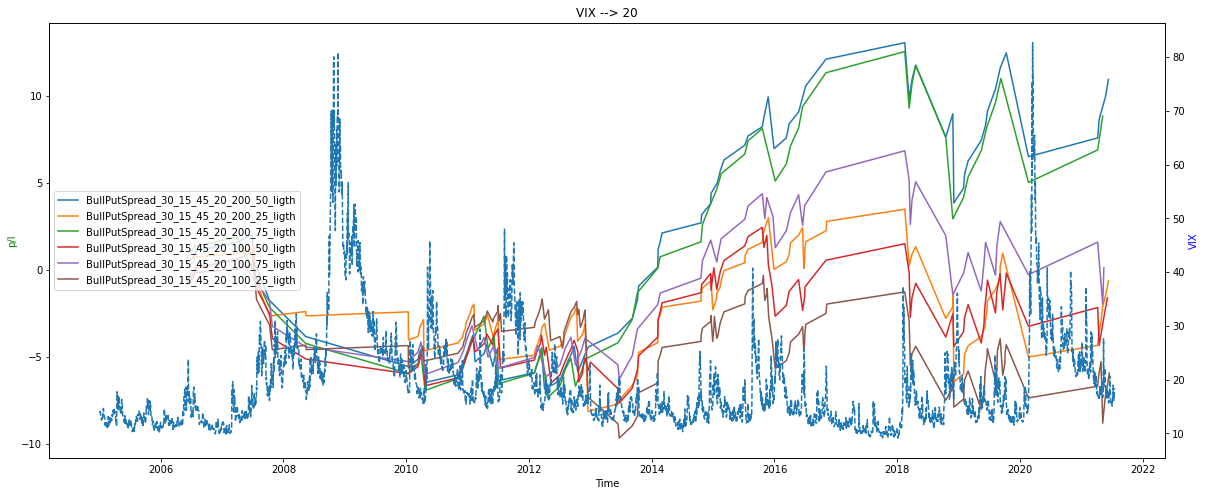

In [120]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
for strategy, d_s in data_set.items():
    dates = list(d_s.keys())
    profits = [t['profit_loss'] for t in d_s.values()]
    p_l_cumm = np.cumsum(profits)
    ax1.plot(dates, p_l_cumm, label=strategy)
ax2.plot(vix._df['time_stamp'], vix._df['bid'], '--')

ax1.legend(loc='center left')
ax1.set_xlabel('Time')
ax1.set_ylabel('p/l', color='g')
ax2.set_ylabel('VIX', color='b')

plt.title(f"VIX --> {VIX}")
plt.show()

In [121]:
for strategy, d_s in data_set.items():
    profits = [t['profit_loss'] for t in d_s.values()]
    total_p_l = sum([x for x in profits if x is not None])
    print(f'{strategy} - Total P/L: {total_p_l}')

BullPutSpread_30_15_45_20_200_50_ligth - Total P/L: 10.969999999999997
BullPutSpread_30_15_45_20_200_25_ligth - Total P/L: -0.610000000000005
BullPutSpread_30_15_45_20_200_75_ligth - Total P/L: 8.860000000000005
BullPutSpread_30_15_45_20_100_50_ligth - Total P/L: -1.6000000000000025
BullPutSpread_30_15_45_20_100_75_ligth - Total P/L: 0.11999999999999633
BullPutSpread_30_15_45_20_100_25_ligth - Total P/L: -5.9300000000000015


In [122]:
for strategy, d_s in data_set.items():
    profits = [t['profit_loss'] for t in d_s.values()]
    total_p_l = sum([x for x in profits if x is not None])
    average_profit = total_p_l / len(profits)
    print(f'{strategy} - Average profit: {average_profit}')

BullPutSpread_30_15_45_20_200_50_ligth - Average profit: 0.12465909090909087
BullPutSpread_30_15_45_20_200_25_ligth - Average profit: -0.004692307692307731
BullPutSpread_30_15_45_20_200_75_ligth - Average profit: 0.14063492063492072
BullPutSpread_30_15_45_20_100_50_ligth - Average profit: -0.014545454545454568
BullPutSpread_30_15_45_20_100_75_ligth - Average profit: 0.001599999999999951
BullPutSpread_30_15_45_20_100_25_ligth - Average profit: -0.038258064516129044


In [123]:
for strategy, d_s in data_set.items():
    average_max_loss = sum([t['max_loss'] for t in d_s.values()]) / len(list(d_s.values()))
    print(f'{strategy} - Average max loss: {average_max_loss}')
    
average_max_loss = sum([t['max_loss'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max loss: {average_max_loss}")

BullPutSpread_30_15_45_20_200_50_ligth - Average max loss: 8.807045454545436
BullPutSpread_30_15_45_20_200_25_ligth - Average max loss: 8.53230769230767
BullPutSpread_30_15_45_20_200_75_ligth - Average max loss: 8.809841269841266
BullPutSpread_30_15_45_20_100_50_ligth - Average max loss: 8.62181818181816
BullPutSpread_30_15_45_20_100_75_ligth - Average max loss: 8.813333333333322
BullPutSpread_30_15_45_20_100_25_ligth - Average max loss: 8.669032258064492
Average max loss: 8.669032258064492


In [124]:
for strategy, d_s in data_set.items():
    average_max_profit = sum([t['max_profit'] for t in d_s.values()]) / len(list(trades.values()))
    print(f'{strategy} - Average max profit: {average_max_profit}')

BullPutSpread_30_15_45_20_200_50_ligth - Average max profit: 0.6716774193548389
BullPutSpread_30_15_45_20_200_25_ligth - Average max profit: 0.9357419354838711
BullPutSpread_30_15_45_20_200_75_ligth - Average max profit: 0.49825806451612925
BullPutSpread_30_15_45_20_100_50_ligth - Average max profit: 0.8407096774193549
BullPutSpread_30_15_45_20_100_75_ligth - Average max profit: 0.5889032258064517
BullPutSpread_30_15_45_20_100_25_ligth - Average max profit: 1.1540645161290322


In [125]:
for strategy, d_s in data_set.items():
    average_trade_length = sum([(t['finish_stamp'] - t['start_stamp']).days for t in d_s.values()]) / len(list(d_s.values()))
    print(f'{strategy} - Average trade in days: {average_trade_length}')

BullPutSpread_30_15_45_20_200_50_ligth - Average trade in days: 15.965909090909092
BullPutSpread_30_15_45_20_200_25_ligth - Average trade in days: 10.115384615384615
BullPutSpread_30_15_45_20_200_75_ligth - Average trade in days: 24.349206349206348
BullPutSpread_30_15_45_20_100_50_ligth - Average trade in days: 12.39090909090909
BullPutSpread_30_15_45_20_100_75_ligth - Average trade in days: 20.2
BullPutSpread_30_15_45_20_100_25_ligth - Average trade in days: 8.425806451612903


In [126]:
for strategy, d_s in data_set.items():
    profits = [t['profit_loss'] for t in d_s.values()]
    total_p_l = sum([x for x in profits if x is not None])
    average_profit = total_p_l / len(profits)
    average_max_loss = sum([t['max_loss'] for t in d_s.values()]) / len(list(d_s.values()))
    average_trade_length = sum([(t['finish_stamp'] - t['start_stamp']).days for t in d_s.values()]) / len(list(d_s.values()))
    average_return_per_month = ((average_profit / average_trade_length) / average_max_loss) * 30  # profit per day / investment * 30 days
    print(f'{strategy} - Average return per month: {average_return_per_month * 100} %')

BullPutSpread_30_15_45_20_200_50_ligth - Average return per month: 2.659630595229277 %
BullPutSpread_30_15_45_20_200_25_ligth - Average return per month: -0.16310182791968902 %
BullPutSpread_30_15_45_20_200_75_ligth - Average return per month: 1.9668060401361223 %
BullPutSpread_30_15_45_20_100_50_ligth - Average return per month: -0.40845716754139594 %
BullPutSpread_30_15_45_20_100_75_ligth - Average return per month: 0.026961848983687295 %
BullPutSpread_30_15_45_20_100_25_ligth - Average return per month: -1.5713110048697612 %
